**Import Libraries/Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam
import os
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from tensorflow.keras.regularizers import l2

In [ ]:
print("GPU :", tf.config.list_physical_devices("GPU"))

GPU : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


Print the shapes of train and test data:-

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0].shape

(32, 32, 3)

Bring the train and test data in the required format:-

In [ ]:
y_train[:10]    

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
# Coverting 2D array to 1D array
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

**Data Visualization and augmentation**

In [ ]:
ciphar10_class_arr = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []
class_8 = []
class_9 = []
for i in range(len(y_train)):
  if int(y_train[i]) == 0 and len(class_0) < 3:
    class_0.append(i)
  if int(y_train[i]) == 1 and len(class_1) < 3:
    class_1.append(i)
  if int(y_train[i]) == 2 and len(class_2) < 3:
    class_2.append(i)
  if int(y_train[i]) == 3 and len(class_3) < 3:
    class_3.append(i)
  if int(y_train[i]) == 4 and len(class_4) < 3:
    class_4.append(i)
  if int(y_train[i]) == 5 and len(class_5) < 3:
    class_5.append(i)
  if int(y_train[i]) == 6 and len(class_6) < 3:
    class_6.append(i)
  if int(y_train[i]) == 7 and len(class_7) < 3:
    class_7.append(i)
  if int(y_train[i]) == 8 and len(class_8) < 3:
    class_8.append(i)
  if int(y_train[i]) == 9 and len(class_9) < 3:
    class_9.append(i)

In [ ]:
single_list = [class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9]

       Sample Images of Class airplane


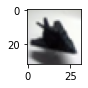

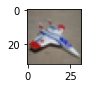

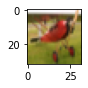

       Sample Images of Class automobile


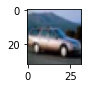

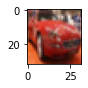

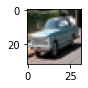

       Sample Images of Class bird


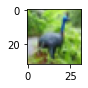

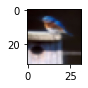

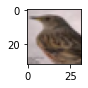

       Sample Images of Class cat


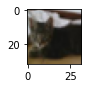

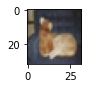

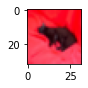

       Sample Images of Class deer


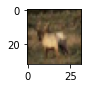

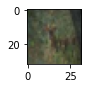

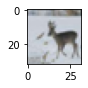

       Sample Images of Class dog


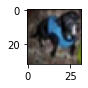

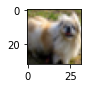

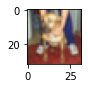

       Sample Images of Class frog


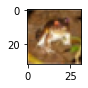

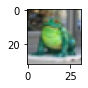

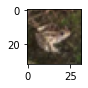

       Sample Images of Class horse


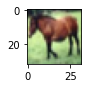

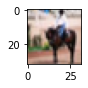

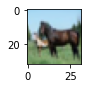

       Sample Images of Class ship


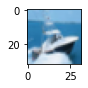

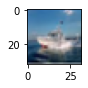

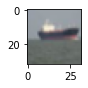

       Sample Images of Class truck


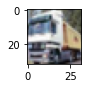

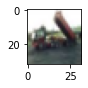

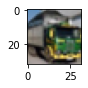

In [ ]:
for id_, i in enumerate(single_list):
  print('==========================================')
  print('       Sample Images of Class %s'%ciphar10_class_arr[id_])
  print('==========================================')
  for j in i:
    plt.figure(figsize=(1, 1))
    # plt.subplot(330 +1+ j)
    plt.imshow(X_train[j])
    plt.show()

**Apply rotation and height shift augmentation**

Images before augmentation

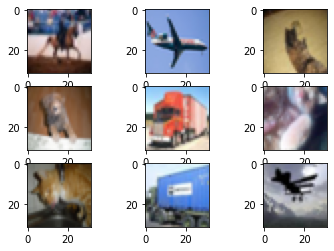

In [ ]:
orig_datagen = ImageDataGenerator(rescale=1.0/255.0)
orig_datagen.fit(X_train)
for X_batch, y_batch in orig_datagen.flow(X_train,y_train,batch_size=9, seed=4):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

Image Rotation by 90 degree

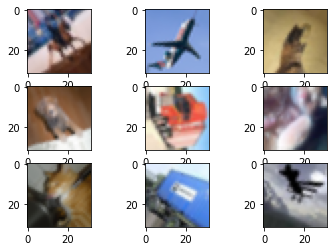

In [ ]:
# rotation augmentation of 90 degree
datagen = ImageDataGenerator(rotation_range=90,rescale=1.0/255.0)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train,y_train,batch_size=9, seed=4):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

Height shift by 0.1

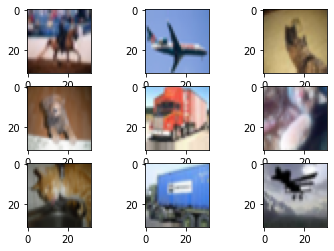

In [ ]:
# height shift augmentation
datagen = ImageDataGenerator(height_shift_range=0.1,rescale=1.0/255.0)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train,y_train,batch_size=9, seed=4):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(X_batch[i])
  pyplot.show()
  break

Normalize the images to a number from 0 to 1

In [ ]:
X_train = X_train / 255.0  
X_test = X_test / 255.0
print("Shape of X Train data:",X_train.shape)
print("Shape of X Test data:",X_test.shape)
print("Shape of Y Train data:",y_train.shape)
print("Shape of Y Test data:",y_test.shape)

Shape of X Train data: (50000, 32, 32, 3)
Shape of X Test data: (10000, 32, 32, 3)
Shape of Y Train data: (50000,)
Shape of Y Test data: (10000,)


Fix the seed to avoid random results

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

**Model Building**

After several attempts to configure the network we arrived at a conclusion that higher overall network accuracy is achieved at 2048 units in first layer and 1024 units layer as compared to other configurations. A dropout layer placed in the middle of two layer enhances the accuracy by reducing overfitting of the network.

In [ ]:
model1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(2048, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), activity_regularizer = keras.regularizers.l2(0.001)),
        layers.Dropout(0.1),
        layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), activity_regularizer = keras.regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')    
    ])
model1.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_43 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_120 (Dense)            (None, 2048)              6293504   
_________________________________________________________________
dropout_40 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_121 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_122 (Dense)            (None, 10)                10250     
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


**Model Compilation**

SGD with LR=0.005 has better accuracy as compared to other optiomizers like Adam or RMS prop. At default rate accouracy was ~50% whereas with 0.005 accuracy is ~52.5%

In [ ]:
model1.compile(optimizer = SGD(learning_rate=0.005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

**Model Training**

As shown in the plots, validation accuracy just begin to decrease at epoch 30 with batch size 32. Therefore, this combination provides best accuracy results with minimum validation loss.

In [ ]:
import time
start = time.time()
print("START : calculating training time")
history = model1.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2, validation_data=(X_test, y_test))
end = time.time()
print("Total time taken for training: %s seconds " % (end - start))

START : calculating training time
Epoch 1/30
1250/1250 [==============================] - 6s 4ms/step - loss: 5.9717 - accuracy: 0.2877 - val_loss: 5.6097 - val_accuracy: 0.3809
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.5474 - accuracy: 0.3898 - val_loss: 5.4228 - val_accuracy: 0.4069
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.3589 - accuracy: 0.4168 - val_loss: 5.2787 - val_accuracy: 0.4235
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.2111 - accuracy: 0.4360 - val_loss: 5.1395 - val_accuracy: 0.4417
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.0763 - accuracy: 0.4549 - val_loss: 5.0189 - val_accuracy: 0.4505
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 4.9521 - accuracy: 0.4705 - val_loss: 4.9518 - val_accuracy: 0.4431
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 4.8435 - accuracy: 0.4814 

Total time taken for training: 139.91468262672424 seconds

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

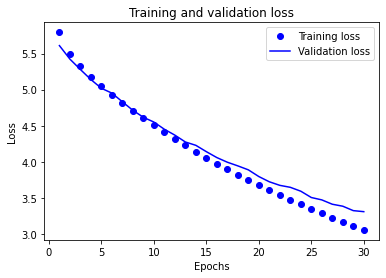

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

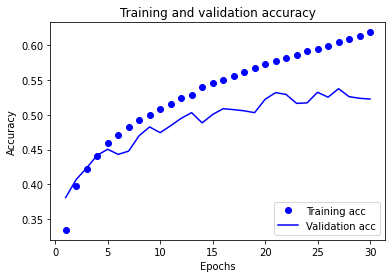

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Model Evaluation**

In [ ]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.2808 - accuracy: 0.5251


[3.280780076980591, 0.5250999927520752]

Classification Report

In [ ]:
y = model1.predict(X_test)
y_ = [np.argmax(element) for element in y]

print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58      1000
           1       0.67      0.64      0.65      1000
           2       0.41      0.41      0.41      1000
           3       0.42      0.31      0.36      1000
           4       0.42      0.53      0.47      1000
           5       0.64      0.20      0.30      1000
           6       0.52      0.67      0.58      1000
           7       0.58      0.64      0.61      1000
           8       0.54      0.76      0.63      1000
           9       0.70      0.44      0.54      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.51     10000
weighted avg       0.54      0.53      0.51     10000



As per F1 score Automobile class is best performing class with F1 score of 0.65 closely followed by Ship class with F1 score of 0.63 and Dog class is least performing class with F1 score of 0.30

Confusion Matrix

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_)
print(confusion_matrix)

tf.Tensor(
[[649  17  30   9  40   2  27  25 184  17]
 [ 63 639  23  12  14   1  24  22 123  79]
 [117  10 409  53 175  15 115  59  42   5]
 [ 62  14 121 313 118  51 169  82  44  26]
 [ 73   9 122  27 530   9 119  72  33   6]
 [ 42   7 145 227 112 197 100 117  42  11]
 [ 23   9  57  40 138  11 674  21  23   4]
 [ 47   8  59  41 103  19  35 640  25  23]
 [100  47  20   9  15   1  11  13 764  20]
 [ 79 197  16  23  21   4  32  53 139 436]], shape=(10, 10), dtype=int32)


In [ ]:
def worst_best_class(confusion_matrix):
  con_arr = confusion_matrix.numpy()
  score_arr = [0,0,0,0,0,0,0,0,0,0]

  for i in range (0, 10):
    row_sum = 0
    score = 0
    cls_correct_count = con_arr[i][i]
    for j in range (0, 10):
      row_sum += con_arr[i][j]
    score = cls_correct_count/row_sum
    score_arr[i]=score

  max = score_arr[0]
  max_i = 0
  for i in range(0,10):
    if max < score_arr[i]:
      max = score_arr[i]
      max_i = i
  print("Best performing class:",ciphar10_class_arr[max_i], "- Correct classification probability :",max)


  min = score_arr[0]
  min_i = 0
  for i in range(0,10):
    if min > score_arr[i]:
      min = score_arr[i]
      min_i = i
  print("Worst performing class:",ciphar10_class_arr[min_i], "- Correct classification probability :",min)



Out of 1000 images 764 Ship images were correctly classified therefore is best class.
Out of 1000 images only 197 Dog images were correctly classified therefore is worst class.

In [ ]:
worst_best_class(confusion_matrix)

Best performing class: ship - Correct classification probability : 0.764
Worst performing class: dog - Correct classification probability : 0.197


#Hyperparameter Tuning 1#

**Dropout layer tuning** 
Changed Dropout layer position to 4th in NN with value of 0.5

Model Building

In [ ]:
model2 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(2048, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), activity_regularizer = keras.regularizers.l2(0.001)),
        layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001), activity_regularizer = keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')    
    ])

Model Summary

In [ ]:
model2.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_141 (Dense)            (None, 2048)              6293504   
_________________________________________________________________
dense_142 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dropout_47 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_143 (Dense)            (None, 10)                10250     
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


**Model Compilation**

In [ ]:
model2.compile(optimizer = SGD(learning_rate=0.005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

**Model Training**

In [ ]:
import time
start = time.time()
print("START : calculating training time")
history = model2.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2, validation_data=(X_test, y_test))
end = time.time()
print("Total time taken for training: %s seconds " % (end - start))

START : calculating training time
Epoch 1/30
1250/1250 [==============================] - 5s 4ms/step - loss: 6.0062 - accuracy: 0.2619 - val_loss: 5.6264 - val_accuracy: 0.3746
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.5781 - accuracy: 0.3691 - val_loss: 5.4459 - val_accuracy: 0.3945
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.3953 - accuracy: 0.3978 - val_loss: 5.3055 - val_accuracy: 0.4082
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.2483 - accuracy: 0.4197 - val_loss: 5.1568 - val_accuracy: 0.4334
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 5.1111 - accuracy: 0.4371 - val_loss: 5.0358 - val_accuracy: 0.4442
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 4.9901 - accuracy: 0.4487 - val_loss: 4.9644 - val_accuracy: 0.4366
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 4.8797 - accuracy: 0.4604 

Total time taken for training: 140.99663138389587 seconds

**Model Evaluation**

Plots

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

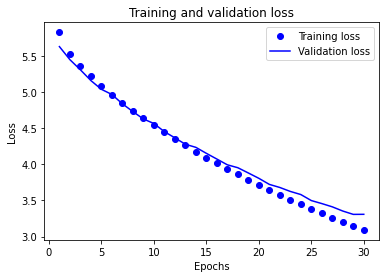

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

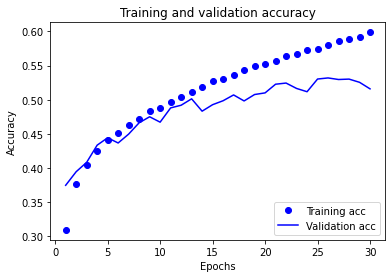

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Model Evaluation**

Accuracy dropped by 1% due to Dropout layer changes

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.2840 - accuracy: 0.5153


[3.2840261459350586, 0.5152999758720398]

Classification Report

In [ ]:
y = model2.predict(X_test)
y_ = [np.argmax(element) for element in y]

print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58      1000
           1       0.63      0.67      0.65      1000
           2       0.42      0.39      0.40      1000
           3       0.41      0.27      0.33      1000
           4       0.38      0.56      0.45      1000
           5       0.63      0.20      0.30      1000
           6       0.53      0.64      0.58      1000
           7       0.54      0.65      0.59      1000
           8       0.56      0.71      0.62      1000
           9       0.73      0.39      0.51      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.50     10000
weighted avg       0.53      0.52      0.50     10000



Confusion Matrix

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_)
print(confusion_matrix)

tf.Tensor(
[[678  24  31   5  47   4  25  27 149  10]
 [ 66 667  13  10  20   3  20  32 112  57]
 [128   9 392  42 208  16  96  66  40   3]
 [ 66  29 115 270 150  57 161  98  35  19]
 [ 72   7 109  26 561   5 110  78  29   3]
 [ 40  12 142 184 151 198  87 134  42  10]
 [ 24   9  56  40 176   9 635  25  22   4]
 [ 47   9  51  44 119  18  24 651  19  18]
 [135  59  20   7  29   1   6  14 708  21]
 [ 84 238  12  23  20   5  34  74 117 393]], shape=(10, 10), dtype=int32)


Ship and Dog are still best and worst classes with Dropout layer changes

In [ ]:
worst_best_class(confusion_matrix)

Best performing class: ship - Correct classification probability : 0.708
Worst performing class: dog - Correct classification probability : 0.198


#Hyperparamter Tuning 2#

**Model Building**

In [ ]:
model3 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1024, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

**Model Compilation**

In [ ]:
model3.compile(optimizer = SGD(learning_rate=0.005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_51 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 2048)              6293504   
_________________________________________________________________
dropout_48 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_145 (Dense)            (None, 1024)              2098176   
_________________________________________________________________
dense_146 (Dense)            (None, 10)                10250     
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [ ]:
import time
start = time.time()
print("START : calculating training time")
history = model3.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2, validation_data=(X_test, y_test))
end = time.time()
print("Total time taken for training: %s seconds " % (end - start))

START : calculating training time
Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0130 - accuracy: 0.2777 - val_loss: 1.7809 - val_accuracy: 0.3819
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7523 - accuracy: 0.3848 - val_loss: 1.6935 - val_accuracy: 0.4121
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6627 - accuracy: 0.4164 - val_loss: 1.6568 - val_accuracy: 0.4250
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6055 - accuracy: 0.4355 - val_loss: 1.6018 - val_accuracy: 0.4411
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5572 - accuracy: 0.4534 - val_loss: 1.5611 - val_accuracy: 0.4524
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5222 - accuracy: 0.4669 - val_loss: 1.5803 - val_accuracy: 0.4471
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4943 - accuracy: 0.4761 

Time for training - 114.32482433319092 seconds

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

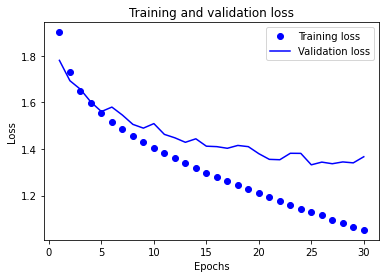

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

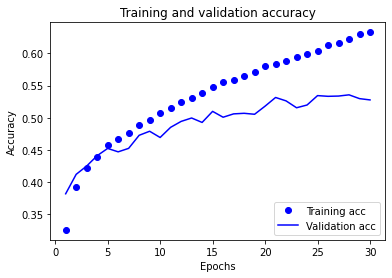

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Model Evaluation**

Regularization removal improved Model accuracy by 0.5% to make it ~53%

In [ ]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3404 - accuracy: 0.5305


[1.3403751850128174, 0.5304999947547913]

Classication Report

In [ ]:
y = model3.predict(X_test)
y_ = [np.argmax(element) for element in y]

print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1000
           1       0.64      0.66      0.65      1000
           2       0.43      0.42      0.43      1000
           3       0.40      0.32      0.35      1000
           4       0.43      0.53      0.47      1000
           5       0.59      0.22      0.32      1000
           6       0.55      0.65      0.60      1000
           7       0.52      0.70      0.60      1000
           8       0.55      0.75      0.64      1000
           9       0.70      0.42      0.53      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000



Automobile, Ship still have high F1 score and Dog is lowest F1 score.

Confusion Matrix

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_)
print(confusion_matrix)

tf.Tensor(
[[647  23  35  10  35   2  29  38 166  15]
 [ 48 655  17  15  17   2  17  36 118  75]
 [ 97  13 421  55 169  23  99  84  36   3]
 [ 43  20 106 316 119  68 146 113  44  25]
 [ 56  11 128  33 525   9 106  96  30   6]
 [ 30   9 121 226 113 216  88 146  39  12]
 [ 17  12  62  50 145  11 654  29  18   2]
 [ 30  13  53  49  72  24  23 700  23  13]
 [ 92  48  20   9  23   2   7  22 752  25]
 [ 63 219  14  24  17   7  24  83 130 419]], shape=(10, 10), dtype=int32)


Ship and Dog are still Best and Worst classes respectively.

In [ ]:
worst_best_class(confusion_matrix)

Best performing class: ship - Correct classification probability : 0.752
Worst performing class: dog - Correct classification probability : 0.216


**Final Conclusion** -
Three image classification models were trained with different Hyperparameters.

**Model1** - 2 Dense layers had L2 regularizers, Dropout between 2 hidden layers with SGD optimiser having 0.005 LR. This model had accuracy of **52.5%** with training time of ~140s.

**Model2** - When the position of dropout layer was changed to 4th in network, the accuracy droped to **51.5%** and the training time remained nearly same ~140 sec. Model does not seems to be overfitted as increasing dropout from 0.1 to 0.5 has deecreased accuracy by 1% as compared to model1.

**Model3** - In this model L2 regularizers are removed as compared to model1 thereby reducing the self induced loss while backpropogating. This  increased the model accuracy by ~0.5% to **53%** implying the model is not overfitted as L2 regularizers were adding negative impact on the model1. Also, the training time has reduced considerably to ~115s.

SGD optimiser performed way better than other optimisers like Adam or RMSProp.

With all this tuning there has been not major impact on classification results of the model best and worst classes remained same in all the models.
**Best - Ship
Worst - Dog**